In [1]:
import pandas as pd
%pylab inline
from glob import glob
import csv

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Listado de ficheros entrada DeathsEmissions por emisión
ListFichDeathsEmissionsFinal = glob('../../../TFM/TFM_Industrials_Pollutants/data/csv/Modelo/DeathsEmissions_final_*.csv')

In [3]:
#Genera Df año 2015
df = pd.DataFrame()
Df1 = pd.DataFrame()

for i in range(0,len(ListFichDeathsEmissionsFinal)):   
            
    DfDeathsEmissions = pd.read_csv(ListFichDeathsEmissionsFinal[i],sep=';',compression='gzip') #cargamos df con cada fichero

    Df1['ProvinciaReside'] = DfDeathsEmissions['ProvinciaReside']
    Df1['MunicipioReside'] = DfDeathsEmissions['MunicipioReside']
    Df1['Sexo']            = DfDeathsEmissions['Sexo']     
    Df1['EstadoCivil']     = DfDeathsEmissions['EstadoCivil'] 
    Df1['AnioCumplidos']   = DfDeathsEmissions['AnioCumplidos'] 
    Df1['Contaminante']    = DfDeathsEmissions['Contaminante']
    Df1['NivelEstudios']   = DfDeathsEmissions['NivelEstudios'] 
#    Df1['CantidadTotalkg'] = DfDeathsEmissions['CantidadTotalkg']
    Df1['TotalAniosId']    = DfDeathsEmissions['TotalAniosId'] 
    Df1['AnioDefuncion']   = DfDeathsEmissions['AnioDefuncion'] 
    Df1['CausaMuertebas1'] = DfDeathsEmissions['CausaMuertebas1']
    
    df = df.append(Df1[Df1['AnioDefuncion']==2015])


In [4]:
df['Contaminante'] = pd.factorize(df['Contaminante'] )[0]
df['CausaMuertebas1'] = pd.factorize(df['CausaMuertebas1'] )[0]

In [5]:
X=df.loc[:,'ProvinciaReside':'TotalAniosId']
y=df['CausaMuertebas1']

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

clf1 = DecisionTreeClassifier(random_state=1)
clf2 = GaussianNB()
clf3 = LogisticRegression()
clf4 = KNeighborsClassifier(n_neighbors=5)

In [7]:
from sklearn.model_selection import cross_val_score
print (cross_val_score(clf1, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(clf2, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(clf4, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(clf3, X, y, cv=10,scoring="accuracy").mean())

0.587578482388
0.358465791677
0.429027707314
0.374806173978


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
clf4.fit(X_train,y_train)
preds={}
preds["DecisionTreeClassifier"]=clf1.predict(X_test)
preds["Gaussian"]=clf2.predict(X_test)
preds["Logistic"]=clf3.predict(X_test)
preds["KNeighbors"]=clf4.predict(X_test)

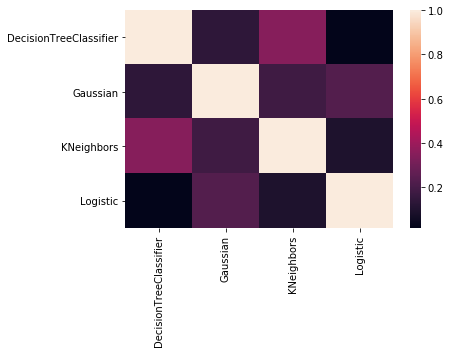

In [10]:
import seaborn as sns
sns.heatmap(pd.DataFrame(preds).corr())
plt.show()

## Voting

In [11]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('tree', clf1), ('gaussian', clf2),("Kneighbors",clf4)])
print (cross_val_score(eclf, X, y, cv=10,scoring="accuracy").mean())

0.484699435715


## Stacking

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
mr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf3, clf2, clf4], meta_classifier=mr)

In [ ]:
print (cross_val_score(clf1, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(clf2, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(clf3, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(clf4, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(sclf, X, y, cv=10,scoring="accuracy").mean())

In [ ]:
print (cross_val_score(sclf, X, y, cv=10,scoring="accuracy").mean())

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bclf = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100)

In [ ]:
print (cross_val_score(bclf, X, y, cv=10,scoring="accuracy").mean())

In [ ]:
bclf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100)

In [ ]:
print (cross_val_score(bclf, X, y, cv=10,scoring="accuracy").mean())

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand = RandomForestClassifier(n_estimators=100,max_depth=4)

In [ ]:
rand.fit(X_train,y_train)

In [ ]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [ ]:
dot_data = tree.export_graphviz(rand.estimators_[6], out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  

In [ ]:
print (cross_val_score(rand, X, y, cv=10,scoring="accuracy").mean())

## Boosted Trees with sklearn

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
rand = GradientBoostingClassifier(n_estimators=100)

In [ ]:
print (cross_val_score(rand, X, y, cv=10,scoring="accuracy").mean())

In [ ]:
from xgboost import XGBClassifier

In [ ]:
rand = XGBClassifier(n_estimators=100)

In [ ]:
print (cross_val_score(rand, X, y, cv=10,scoring="accuracy").mean())

## Metrics

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

In [ ]:
rand.fit(X_train,y_train)

In [ ]:
print(accuracy_score(y_test,rand.predict(X_test)))

In [ ]:
print(classification_report(y_test,rand.predict(X_test)))

In [ ]:
sns.heatmap(confusion_matrix(y_test,rand.predict(X_test)),annot=True)